In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('amazon_products/Speakers.csv', encoding='utf-8', engine='python')
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Echo Dot (3rd Gen) - Smart speaker with Alexa,...","tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/61EXU8BuGZ...,https://www.amazon.in/Echo-Dot-3rd-Gen/dp/B07P...,4.4,"98,293","₹2,499","₹4,499"
1,ZEBRONICS Zeb-Astra 20 Wireless BT v5.0 Portab...,"tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/71yCNxkT4G...,https://www.amazon.in/ZEBRONICS-Zeb-Astra-20-W...,3.8,"2,394",₹899,"₹2,299"
2,Zebronics ZEB-COUNTY 3W Wireless Bluetooth Por...,"tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/81U3kN9bf1...,https://www.amazon.in/Zebronics-Zeb-County-Blu...,3.9,"66,450",₹499,₹999
3,boAt Stone 352 Bluetooth Speaker with 10W RMS ...,"tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/61K8FS335J...,https://www.amazon.in/boAt-Bluetooth-Resistanc...,4.0,"3,875","₹1,699","₹3,490"
4,"Infinity (JBL Fuze Pint, Wireless Ultra Portab...","tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/71K6mroOBJ...,https://www.amazon.in/Infinity-Fuze-Pint-Porta...,4.1,"31,100",₹899,"₹1,999"


In [9]:
df.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [38]:
unique = df.actual_price.unique()

['₹4,499' '₹2,299' '₹999' ... '₹26,879.50' '₹3,897' '₹8,549']


In [46]:
df.replace('nan', np.nan, inplace=True)
df.dropna()
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Echo Dot (3rd Gen) - Smart speaker with Alexa,...","tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/61EXU8BuGZ...,https://www.amazon.in/Echo-Dot-3rd-Gen/dp/B07P...,4.4,"98,293","₹2,499","₹4,499"
1,ZEBRONICS Zeb-Astra 20 Wireless BT v5.0 Portab...,"tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/71yCNxkT4G...,https://www.amazon.in/ZEBRONICS-Zeb-Astra-20-W...,3.8,"2,394",₹899,"₹2,299"
2,Zebronics ZEB-COUNTY 3W Wireless Bluetooth Por...,"tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/81U3kN9bf1...,https://www.amazon.in/Zebronics-Zeb-County-Blu...,3.9,"66,450",₹499,₹999
3,boAt Stone 352 Bluetooth Speaker with 10W RMS ...,"tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/61K8FS335J...,https://www.amazon.in/boAt-Bluetooth-Resistanc...,4.0,"3,875","₹1,699","₹3,490"
4,"Infinity (JBL Fuze Pint, Wireless Ultra Portab...","tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/71K6mroOBJ...,https://www.amazon.in/Infinity-Fuze-Pint-Porta...,4.1,"31,100",₹899,"₹1,999"


In [49]:
def convert_money_strin_to_float(x):
    if type(x) is float:
        print(x)
    translation_mapping_dict = {ord(","): None}
    x.translate(translation_mapping_dict)
    x = x[1:]
    y = []
    for char in x:
        if char == ",":
            continue
        y.append(char)
    x = "".join(y)

    float(x)
    return x

def convert_yen_to_dollars(row):
    if type(row['discount_price']) is not float:
        row['discount_price'] = convert_money_strin_to_float(row['discount_price'])
    if type(row['actual_price']) is not float:
        row['actual_price'] = convert_money_strin_to_float(row['actual_price'])
    return row

dollars_priced_df = df.copy()
dollars_priced_df.apply(convert_yen_to_dollars, axis=1)

dollars_priced_df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Echo Dot (3rd Gen) - Smart speaker with Alexa,...","tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/61EXU8BuGZ...,https://www.amazon.in/Echo-Dot-3rd-Gen/dp/B07P...,4.4,"98,293",2499,4499
1,ZEBRONICS Zeb-Astra 20 Wireless BT v5.0 Portab...,"tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/71yCNxkT4G...,https://www.amazon.in/ZEBRONICS-Zeb-Astra-20-W...,3.8,"2,394",899,2299
2,Zebronics ZEB-COUNTY 3W Wireless Bluetooth Por...,"tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/81U3kN9bf1...,https://www.amazon.in/Zebronics-Zeb-County-Blu...,3.9,"66,450",499,999
3,boAt Stone 352 Bluetooth Speaker with 10W RMS ...,"tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/61K8FS335J...,https://www.amazon.in/boAt-Bluetooth-Resistanc...,4.0,"3,875",1699,3490
4,"Infinity (JBL Fuze Pint, Wireless Ultra Portab...","tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/71K6mroOBJ...,https://www.amazon.in/Infinity-Fuze-Pint-Porta...,4.1,"31,100",899,1999


In [51]:
orders_df = pd.read_csv('amazon_orders.csv', encoding='utf-8', index_col="Row ID")
orders_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [55]:
print("Segment")
print(orders_df['Segment'].unique())

print("Ship Mode")
print(orders_df['Ship Mode'].unique())


Segment
['Consumer' 'Corporate' 'Home Office']
Ship Mode
['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [56]:
orders_df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [59]:
orders_df.dropna(inplace=True)
orders_df.isnull().any()

Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
dtype: bool

In [67]:
postcode_as_string_df = orders_df.copy()
postcode_as_string_df = postcode_as_string_df.astype({"Postal Code": str})
postcode_as_string_df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [74]:
# What was the most sold product
most_common_product = postcode_as_string_df["Product Name"].value_counts()[:10]
print(most_common_product)

Product Name
Staple envelope                               47
Staples                                       46
Easy-staple paper                             44
Avery Non-Stick Binders                       20
Staples in misc. colors                       18
Staple remover                                18
KI Adjustable-Height Table                    17
Storex Dura Pro Binders                       17
Staple-based wall hangings                    16
Situations Contoured Folding Chairs, 4/Set    15
Name: count, dtype: int64


In [80]:
most_common_product.values

array([47, 46, 44, 20, 18, 18, 17, 17, 16, 15])

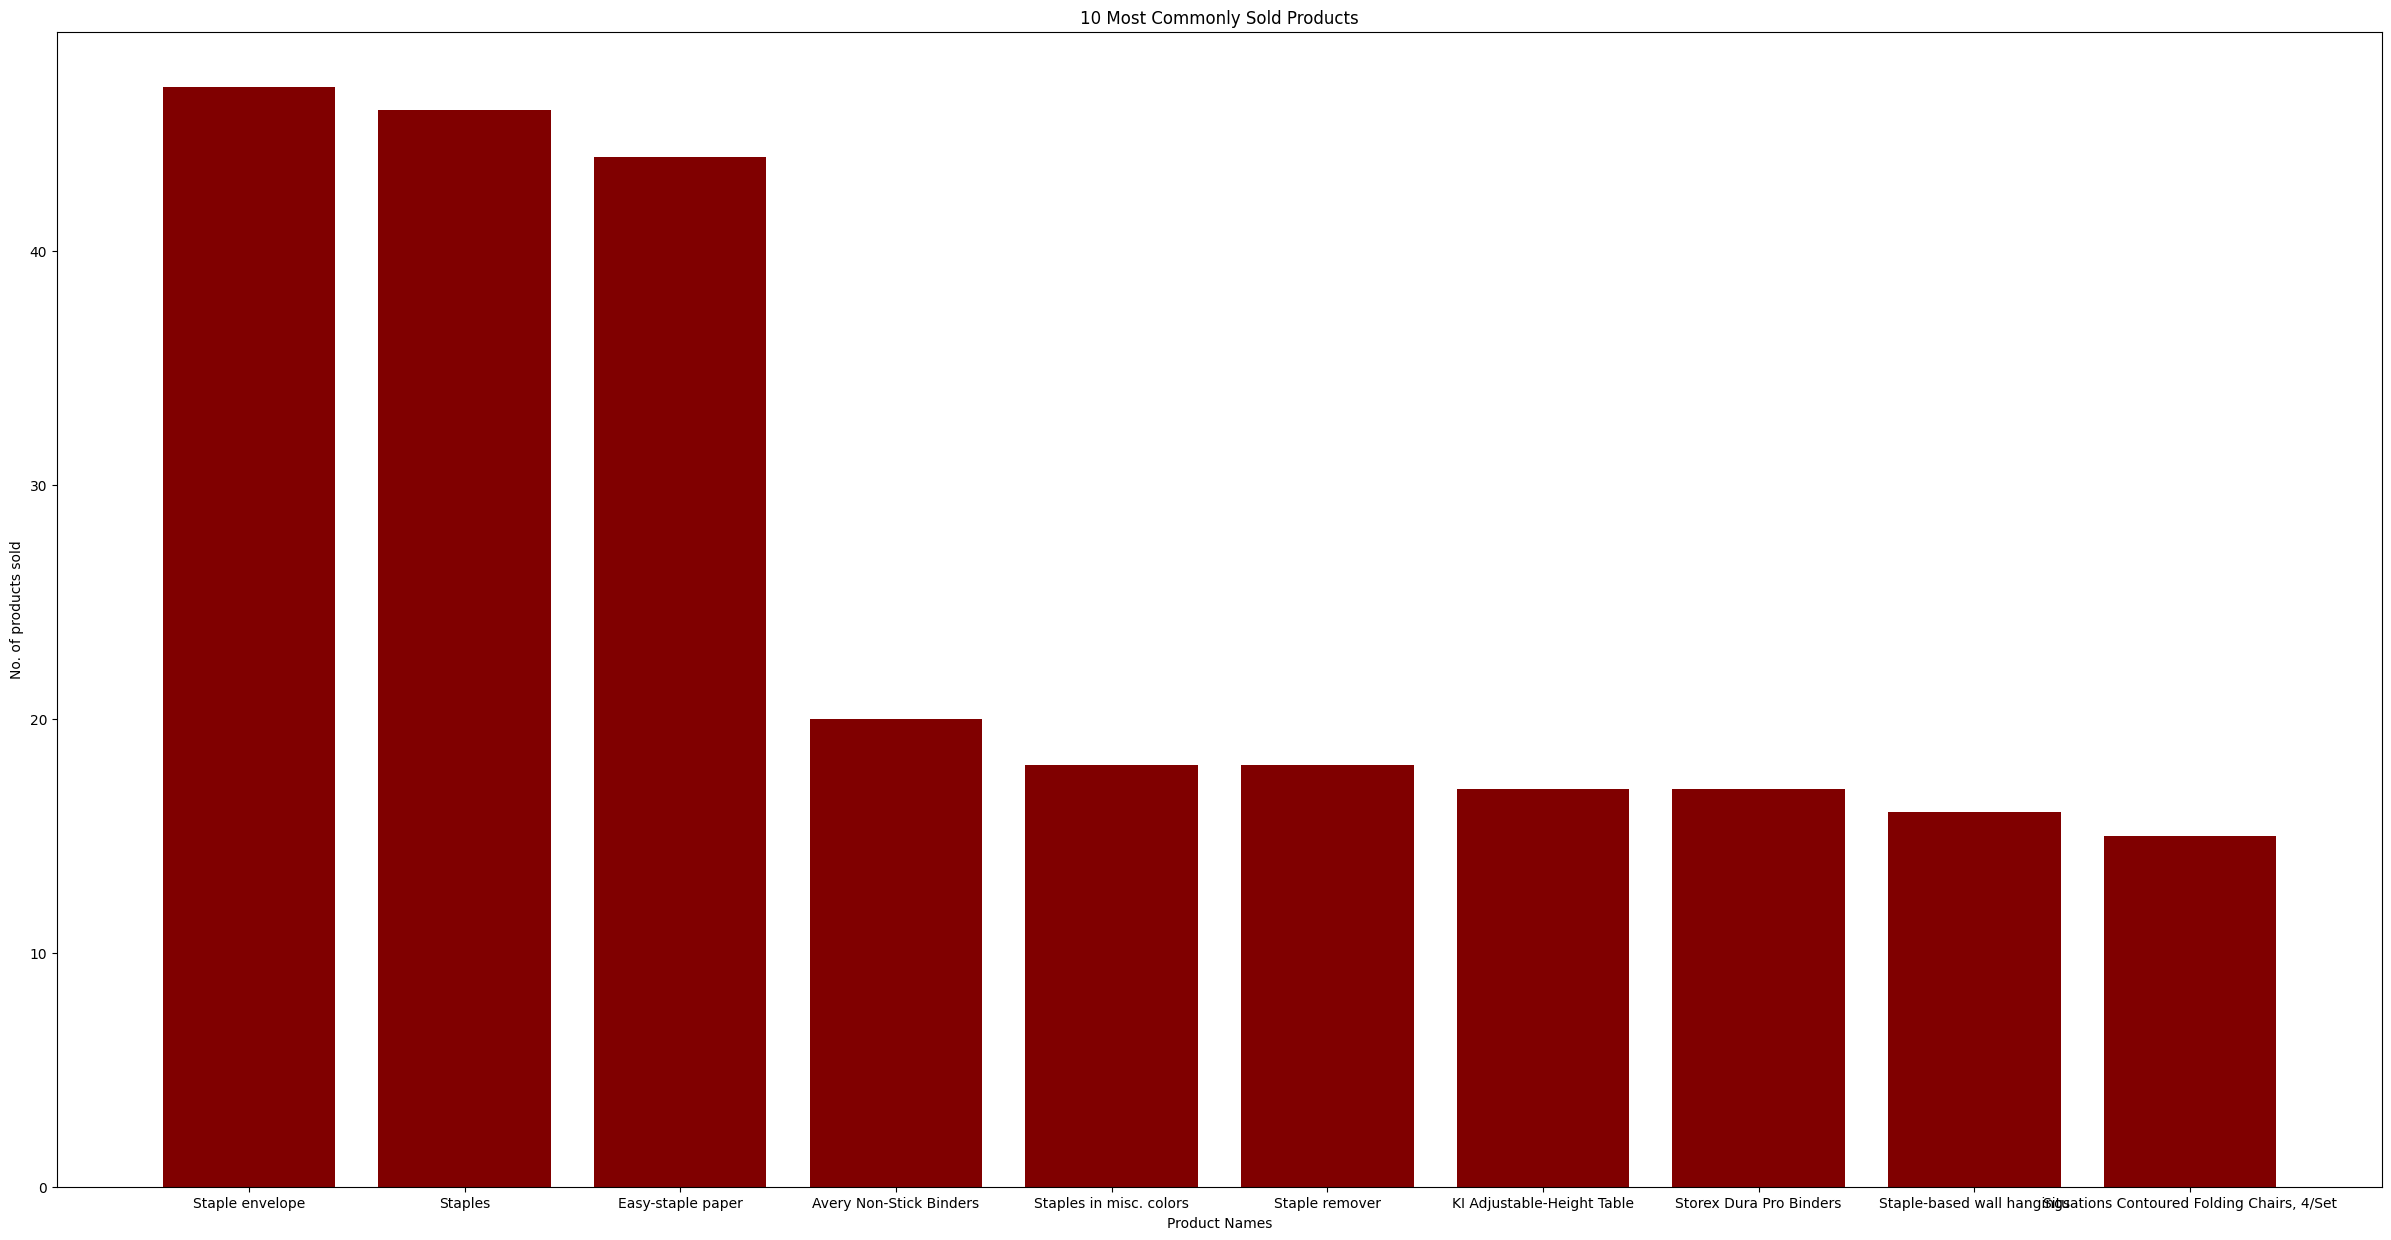

In [87]:
# Plot bar graph
x_len = len(most_common_product.index)
x = np.arange(1, x_len + 1, 2)
y = most_common_product.values

fig = plt.figure(figsize = (30, 15))
plt.bar(most_common_product.index, y, color='maroon')
plt.xlabel("Product Names")
plt.ylabel("No. of products sold")
plt.title("10 Most Commonly Sold Products")
plt.show()

In [ ]:
# Populate tables